<a href="https://colab.research.google.com/github/santiagonajera/RegresionLineal_CostoEntregas/blob/main/RegresionLineal_CostoEntregas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datos cargados exitosamente

Primeras filas de los datos:
   costo_total  tiempo_entrega   distancia  costo_combustible  volumen_carga  \
0   204.819236        5.386100  291.796609          26.057760     676.632314   
1   121.822431        3.637278  187.688805          28.225623     691.670801   
2   129.280438        4.432245  314.697179          14.834843     538.102296   
3   112.951768        4.197627  313.532089          22.615081     701.050624   
4   147.949027        6.287110  353.666733          24.729675     522.475244   

   temporada_alta  
0               1  
1               0  
2               0  
3               0  
4               0  


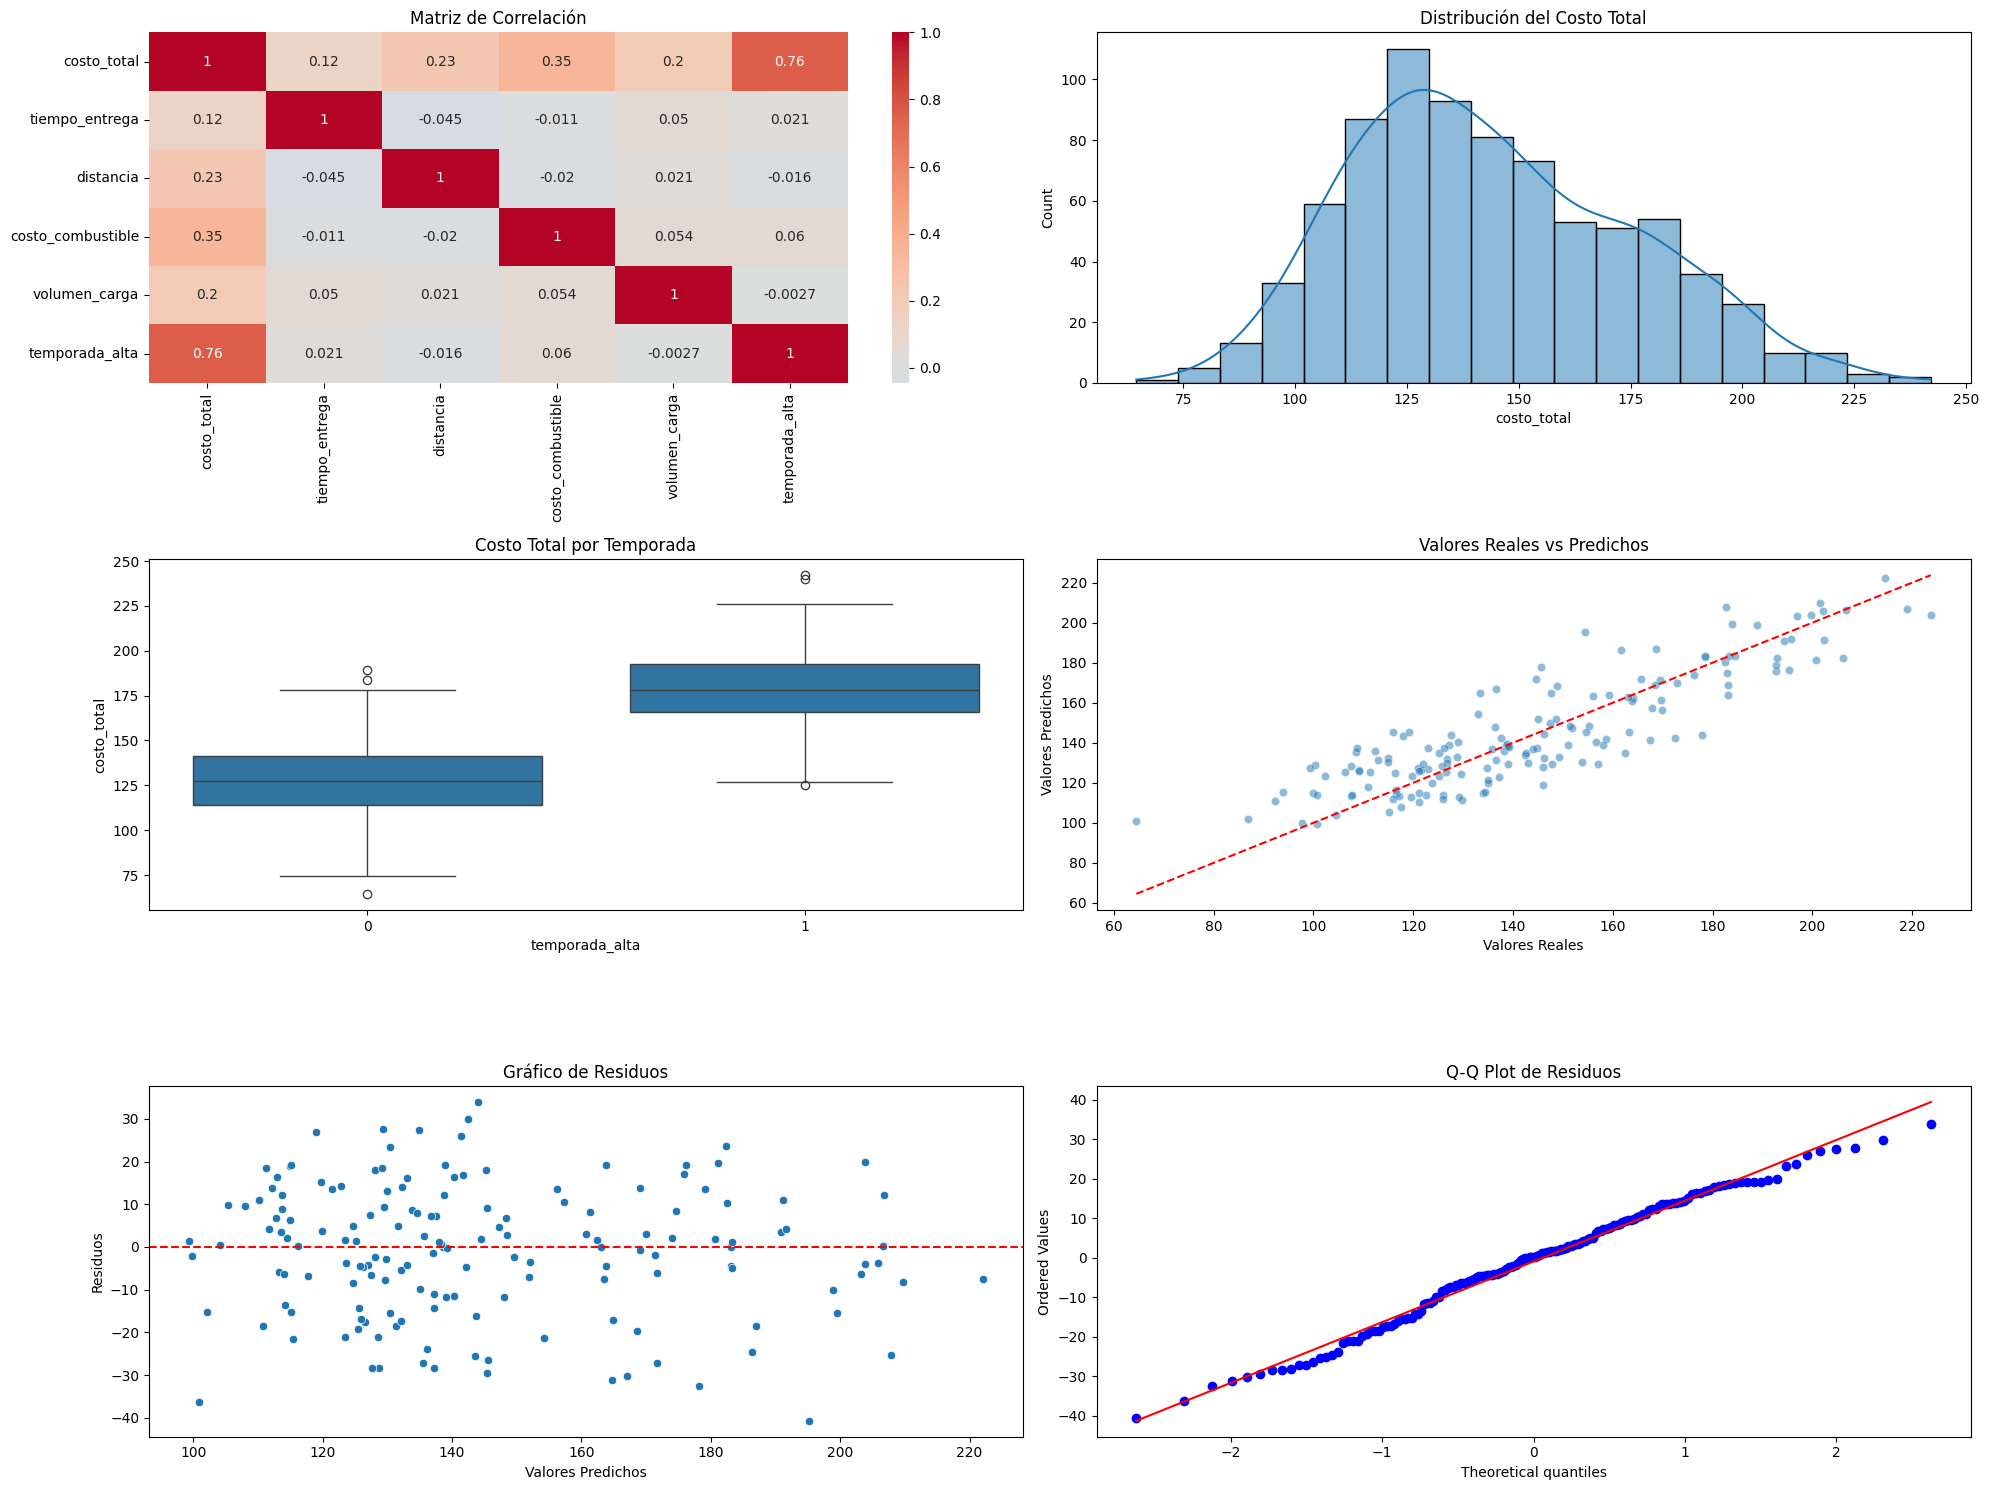


Métricas del Modelo de Regresión:
--------------------------------------------------
R² Score: 0.7569
RMSE: 15.2693

Importancia de Variables:
--------------------------------------------------
         Variable  Coeficiente
   temporada_alta    50.586291
costo_combustible     9.064782
        distancia     7.799355
    volumen_carga     5.661600
   tiempo_entrega     3.634678

Estadísticas Descriptivas de las Variables:
--------------------------------------------------
       costo_total  tiempo_entrega     distancia  costo_combustible  \
count   800.000000    8.000000e+02  8.000000e+02       8.000000e+02   
mean    143.934210   -1.887379e-17  5.329071e-17      -8.082424e-16   
std      31.066089    1.000626e+00  1.000626e+00       1.000626e+00   
min      64.500735   -3.054374e+00 -2.952615e+00      -3.243888e+00   
25%     121.025074   -6.469836e-01 -7.065464e-01      -6.812349e-01   
50%     139.161805    5.966625e-04  8.822763e-03       3.154864e-02   
75%     165.827090    6.53

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from scipy import stats

def analizar_datos_suministro(url):
    """
    Analiza los datos de la cadena de suministro desde un archivo CSV en GitHub.
    Incluye análisis visual y numérico completo.
    """
    # Cargar datos
    data = pd.read_csv(url)
    print("Datos cargados exitosamente")
    print("\nPrimeras filas de los datos:")
    print(data.head())

    # Estandarizar variables numéricas
    scaler = StandardScaler()
    numerical_cols = ['tiempo_entrega', 'distancia', 'costo_combustible', 'volumen_carga']
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

    # Dividir datos en entrenamiento y prueba
    X = data[['tiempo_entrega', 'distancia', 'costo_combustible', 'volumen_carga', 'temporada_alta']]
    y = data['costo_total']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Ajustar modelo de regresión
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    # Predicciones
    y_pred = modelo.predict(X_test)

    # Calcular métricas
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Modelo statsmodels para estadísticas detalladas
    X_train_sm = sm.add_constant(X_train)
    modelo_sm = sm.OLS(y_train, X_train_sm).fit()

    # VISUALIZACIONES
    plt.figure(figsize=(20, 15))

    # 1. Matriz de correlación
    plt.subplot(3, 2, 1)
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Matriz de Correlación')

    # 2. Distribución del costo total
    plt.subplot(3, 2, 2)
    sns.histplot(data=data, x='costo_total', kde=True)
    plt.title('Distribución del Costo Total')

    # 3. Box plot por temporada
    plt.subplot(3, 2, 3)
    sns.boxplot(data=data, x='temporada_alta', y='costo_total')
    plt.title('Costo Total por Temporada')

    # 4. Valores reales vs predichos
    plt.subplot(3, 2, 4)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title('Valores Reales vs Predichos')
    plt.xlabel('Valores Reales')
    plt.ylabel('Valores Predichos')

    # 5. Gráfico de residuos
    residuos = y_test - y_pred
    plt.subplot(3, 2, 5)
    sns.scatterplot(x=y_pred, y=residuos)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Gráfico de Residuos')
    plt.xlabel('Valores Predichos')
    plt.ylabel('Residuos')

    # 6. QQ plot
    plt.subplot(3, 2, 6)
    stats.probplot(residuos, dist="norm", plot=plt)
    plt.title('Q-Q Plot de Residuos')

    plt.tight_layout()
    plt.show()

    # ANÁLISIS NUMÉRICO

    # 1. Métricas del modelo
    print("\nMétricas del Modelo de Regresión:")
    print("-" * 50)
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")

    # 2. Análisis de variables
    importancia_variables = pd.DataFrame({
        'Variable': X.columns,
        'Coeficiente': modelo.coef_,
        'Coeficiente_Abs': np.abs(modelo.coef_)
    }).sort_values('Coeficiente_Abs', ascending=False)

    print("\nImportancia de Variables:")
    print("-" * 50)
    print(importancia_variables[['Variable', 'Coeficiente']].to_string(index=False))

    # 3. Estadísticas descriptivas
    print("\nEstadísticas Descriptivas de las Variables:")
    print("-" * 50)
    print(data.describe())

    # 4. Correlaciones
    print("\nMatriz de Correlaciones:")
    print("-" * 50)
    print(data.corr()['costo_total'].sort_values(ascending=False))

    # 5. Resumen del modelo statsmodels
    print("\nResumen Detallado del Modelo:")
    print("-" * 50)
    print(modelo_sm.summary())

    # 6. Análisis por temporada
    print("\nEstadísticas por Temporada:")
    print("-" * 50)
    print(data.groupby('temporada_alta')['costo_total'].describe())

    # 7. Test de normalidad de residuos
    _, p_value = stats.normaltest(residuos)
    print("\nTest de Normalidad de Residuos:")
    print("-" * 50)
    print(f"p-valor: {p_value:.4f}")
    print(f"Los residuos {'son' if p_value > 0.05 else 'no son'} normales (α=0.05)")

if __name__ == "__main__":
    # URL del archivo en GitHub
    url = "https://github.com/santiagonajera/RegresionLineal_CostoEntregas/raw/refs/heads/main/costo_total_tiempo_entrega.csv"

    # Ejecutar análisis
    analizar_datos_suministro(url)